In [1]:
from neo.core import SpikeTrain
import elephant as eph
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import quantities as q

%config Completer.use_jedi = False

mpl.rcParams.update({'font.size': 20})

In [2]:
def eval_spikes(graphno):
    mat = np.loadtxt(f'../modules/networks/matrix_{graphno}.csv',delimiter=",")
    module = np.loadtxt(f'../modules/networks/matrix_{graphno}_modules.csv')
    order = np.argsort(module)

    all_events = []
    for pertseed in [59428,13674,84932,72957,85036]:
        events = np.load(f"../data/30LN/LN30_events_{graphno}_{pertseed}.npy",allow_pickle=True)
        all_events.append(events)
    all_events = np.array(all_events,dtype=object)

    axs = []
    for rep in range(5):
        spike_times = []
        for i in range(30):
            spike_times.append(SpikeTrain(np.concatenate([all_events[0,rep,i],
                                               all_events[1,rep,i]+7000,
                                               all_events[2,rep,i]+14000,
                                               all_events[3,rep,i]+21000,
                                               all_events[4,rep,i]+28000])*q.ms,t_stop=35000*q.ms))
        spike_times = np.array(spike_times)
        bst = eph.conversion.BinnedSpikeTrain(list(spike_times),bin_size=50*q.ms)
        axs.append(bst.binarize().to_array())
    axs = np.array(axs) 
    return axs,mat[:,order][order,:]

# Perturbation Reliability (Extended Data Figure 1)

<ipython-input-2-43b25c4b371c>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array(spike_times)
<ipython-input-3-885baf91d94c>:13: RuntimeWarning: divide by zero encountered in log
  entropy = -(temp.sum(axis=0)/5)*np.log(temp.sum(axis=0)/5)
<ipython-input-3-885baf91d94c>:13: RuntimeWarning: invalid value encountered in multiply
  entropy = -(temp.sum(axis=0)/5)*np.log(temp.sum(axis=0)/5)
<ipython-input-2-43b25c4b371c>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array(spike_times)
<ipython-input-3-885baf91d

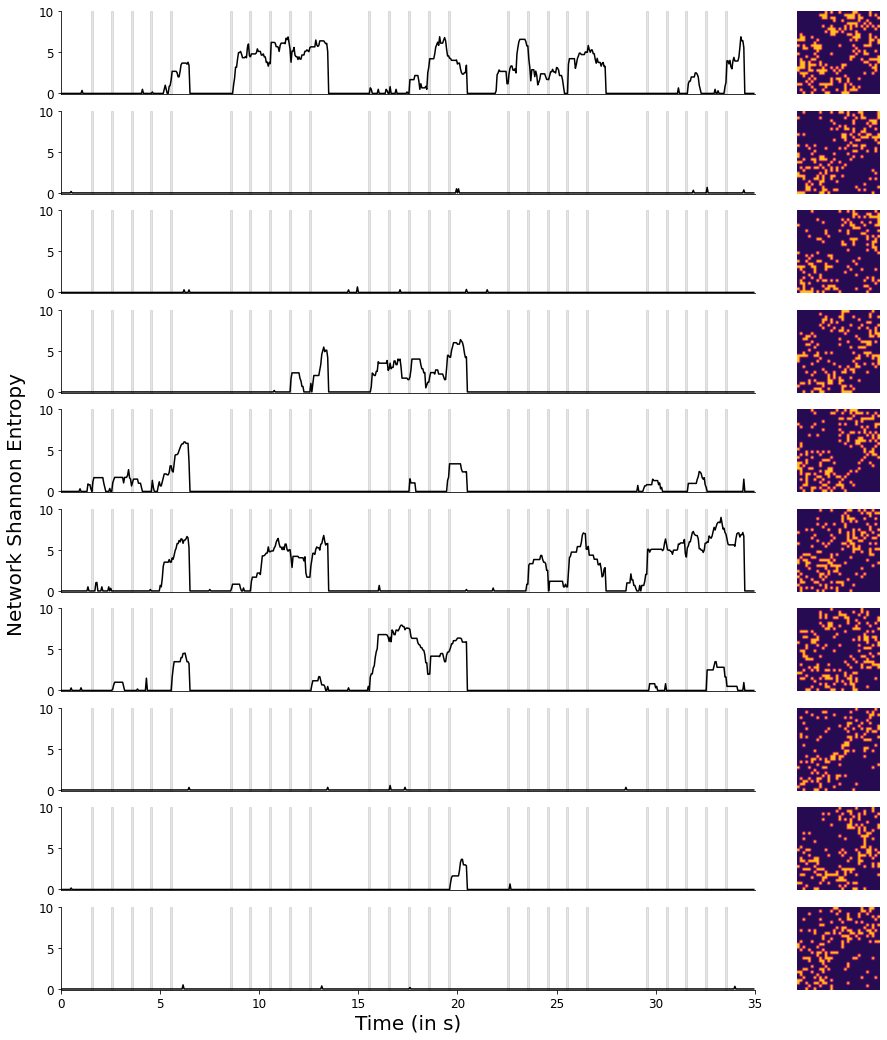

In [3]:
perts = []
for i in range(5):
    for j in range(5):
        perts.append(7*i+1.5+j)
fig = plt.figure(figsize=(15,18))
G = gridspec.GridSpec(10,6)
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12) 
for graphno in range(1,11):
    ax = fig.add_subplot(G[graphno-1,:5])
    temp,mat = eval_spikes(graphno)
    reliability = 2*np.abs((temp.sum(axis=0)/5)-0.5)
    entropy = -(temp.sum(axis=0)/5)*np.log(temp.sum(axis=0)/5)
    plt.plot(np.arange(reliability.shape[1])/20,np.nan_to_num(entropy).sum(axis=0),color='k')
    for pert in perts:
        plt.fill_betweenx([-0.1,10],pert,pert+0.1,alpha=0.1,color='k')
    plt.ylim(-0.1,10)
    plt.xlim(0,35)
    if graphno != 10:
        ax.get_xaxis().set_visible(False)
    else:
        plt.xlabel("Time (in s)")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax = fig.add_subplot(G[graphno-1,5])
    plt.imshow(mat,cmap=plt.cm.inferno)
    plt.clim(-0.2,1.2)
    ax.set_axis_off()
fig.text(0.075, 0.5, 'Network Shannon Entropy', va='center', rotation='vertical')
plt.savefig("Figures/SuppFig_Reliability.svg")

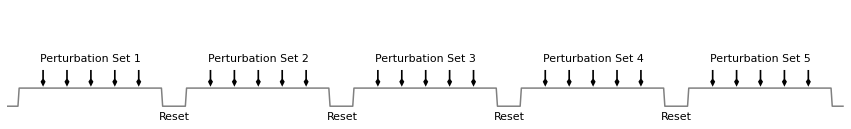

In [4]:
perts = []
for i in range(5):
    for j in range(5):
        perts.append(7*i+1.5+j)
unit = [0]*10+[1]*(140-20)+[0]*10
state = 0.2*np.array(unit*5)
plt.figure(figsize=(15,2))
plt.plot(np.arange(reliability.shape[1])/20,state,color='grey')
for pert in perts:
    plt.quiver(pert,0.4,0,-1,width=0.002,scale=50,headwidth=3,headlength=3)
for i in range(1,5):
    plt.text(7*i,-0.15,"Reset",fontsize=11,ha='center')
for i in range(0,5):
    plt.text(3.5+7*i,0.5,f"Perturbation Set {i+1}",fontsize=11,ha='center')
plt.gca().set_axis_off()
plt.ylim(-0.1,1.1)
plt.xlim(0,35)
plt.savefig("Figures/SuppFig_Trial Sequence.svg")